# Importing Libraries and Loading the Dataset

In [1]:
#Importing Basic Libraries......
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the Titanic Dataset
data=pd.read_csv('train.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.Survived.unique()

array([0, 1], dtype=int64)

In [8]:
#Checking the Class Imbalance Problem
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Cleaning And Preprocessing 

In [9]:
# Extracting The Titles from the passengers name
data['Title']=data['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [10]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Jonkheer      1
Ms            1
Countess      1
Capt          1
Sir           1
Lady          1
Mme           1
Name: Title, dtype: int64

In [11]:
#Replacing the titles with integers
Title_labels={'Mr': 1,'Miss' : 2,'Mrs' : 3,'Master' : 4,'Dr' : 4,'Rev' : 4,'Major' : 4,'Mlle' : 4,'Col' : 4,'Jonkheer' : 4,'Mme' : 4,'Capt' : 4,'Countess':4,'Sir' : 4,'Lady' : 4,'Ms' : 4,'Don' : 4}
data['Title']=data['Title'].map(Title_labels)

In [12]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,3


In [13]:
#Dropping the name column from Dataset.....
data=data.drop(['Name'],axis=1)

In [14]:
#Repalcing the Sex with Integers
sex_labels={'male': 0 , 'female': 1}
data['Sex']=data['Sex'].map(sex_labels)

In [15]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,3


In [16]:
#Dropping Down the Ticket column from the dataset
data=data.drop(['Ticket'],axis=1)

In [17]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,2
3,4,1,1,1,35.0,1,0,53.1000,C123,S,3
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,1
5,6,0,3,0,NaN,0,0,8.4583,NaN,Q,1
6,7,0,1,0,54.0,0,0,51.8625,E46,S,1
7,8,0,3,0,2.0,3,1,21.0750,NaN,S,4
8,9,1,3,1,27.0,0,2,11.1333,NaN,S,3
9,10,1,2,1,14.0,1,0,30.0708,NaN,C,3


In [18]:
# Filling the missing values of age in dataset on the basis of the titles of the passenger
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'),inplace=True)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,2
3,4,1,1,1,35.0,1,0,53.1000,C123,S,3
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,1


In [20]:
#Creating the function to set the age in particular range..... 
def age(age1):
    if age1 <= 16:
        return 0
    elif age1 > 16 and age1<=26:
        return 1
    elif age1>26 and age1<=36:
        return 2
    elif age1>36 and age1<=62:
        return 3
    else:
        return 4

In [21]:
data['Age'] = data['Age'].apply(age)


In [22]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,7.2500,NaN,S,1
1,2,1,1,1,3,1,0,71.2833,C85,C,3
2,3,1,3,1,1,0,0,7.9250,NaN,S,2
3,4,1,1,1,2,1,0,53.1000,C123,S,3
4,5,0,3,0,2,0,0,8.0500,NaN,S,1
5,6,0,3,0,2,0,0,8.4583,NaN,Q,1
6,7,0,1,0,3,0,0,51.8625,E46,S,1
7,8,0,3,0,0,3,1,21.0750,NaN,S,4
8,9,1,3,1,2,0,2,11.1333,NaN,S,3
9,10,1,2,1,0,1,0,30.0708,NaN,C,3


In [23]:
# Converting the Embarked values into the integers......
Embarked_labels = {'S': 0,'C': 1, 'Q': 2}
data['Embarked']=data['Embarked'].map(Embarked_labels)

In [24]:
#Filling the missing values of embarked on the basis of pclass
data['Embarked'].fillna(data.groupby('Pclass')['Embarked'].transform('median'),inplace=True)

In [25]:
data['Fare'].isnull().sum()

0

In [26]:
data['Cabin'].isnull().sum()

687

In [27]:
#Dropping down the UnNecessary columb=ns from the dataset......
data=data.drop(['Cabin','Fare','PassengerId'],axis=1)

In [28]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,1,1,0,0.0,1
1,1,1,1,3,1,0,1.0,3
2,1,3,1,1,0,0,0.0,2
3,1,1,1,2,1,0,0.0,3
4,0,3,0,2,0,0,0.0,1
5,0,3,0,2,0,0,2.0,1
6,0,1,0,3,0,0,0.0,1
7,0,3,0,0,3,1,0.0,4
8,1,3,1,2,0,2,0.0,3
9,1,2,1,0,1,0,1.0,3


In [29]:
#instead of two columns SibSp and Parch .....A familySize column is created fro better visualisation of the dataset.....
#FamilySize = Sibsp + Parch +1 (+1 is used for the individual passenger)
data['family']=data['SibSp'] + data ['Parch'] + 1

In [30]:
max(data['family'])

11

In [31]:
min(data['family'])

1

In [32]:
#Creating the function for the Family size in some particular range
def family(family1):
    if family1 <= 4:
        return 1
    elif family1 > 4 and family1<=7:
        return 2
    elif family1>7 and family1<=11:
        return 3
    

In [33]:
data['family']=data['family'].apply(family)

In [34]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,family
0,0,3,0,1,1,0,0.0,1,1
1,1,1,1,3,1,0,1.0,3,1
2,1,3,1,1,0,0,0.0,2,1
3,1,1,1,2,1,0,0.0,3,1
4,0,3,0,2,0,0,0.0,1,1
5,0,3,0,2,0,0,2.0,1,1
6,0,1,0,3,0,0,0.0,1,1
7,0,3,0,0,3,1,0.0,4,2
8,1,3,1,2,0,2,0.0,3,1
9,1,2,1,0,1,0,1.0,3,1


In [35]:
#Dropping down the SibSp and Parch
data=data.drop(['SibSp','Parch'],axis=1)

In [36]:
# data.head(10)
data


,Survived,Pclass,Sex,Age,Embarked,Title,family
0,0,3,0,1,0.0,1,1
1,1,1,1,3,1.0,3,1
2,1,3,1,1,0.0,2,1
3,1,1,1,2,0.0,3,1
4,0,3,0,2,0.0,1,1
5,0,3,0,2,2.0,1,1
6,0,1,0,3,0.0,1,1
7,0,3,0,0,0.0,4,2
8,1,3,1,2,0.0,3,1
9,1,2,1,0,1.0,3,1


In [37]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
Title       0
family      0
dtype: int64

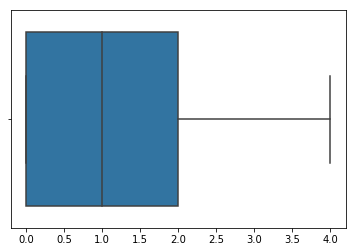

In [38]:
#Checking the Outliers.....
sns.boxplot(data)

# Modelling 

In [39]:
X=data.drop(['Survived'],axis=1)
y=data['Survived']

In [40]:
#Splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# DECISION TREE CLASSIFIER

In [41]:
#Fitting the decision tree classifier into the dataset
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
#Predicting the Future result
y_pred=clf.predict(X_test)

In [43]:
#Checking the accuracy of the Traing set
clf.score(X_train,y_train)*100

85.25280898876404

In [44]:
#Checking the accuracy of the Test set
clf.score(X_test,y_test)*100

81.00558659217877

In [45]:
d = pd.DataFrame({'y_pred':y_pred, 'y_test':y_test})

In [46]:
#d

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
result = (cm[0][0]+cm[1][1])/len(y_test)

In [48]:
cm

array([[100,  10],
       [ 24,  45]], dtype=int64)

In [49]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       110
           1       0.82      0.65      0.73        69

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



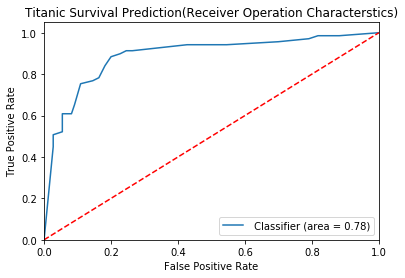

In [50]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Survival Prediction(Receiver Operation Characterstics)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# RANDOM FOREST CLASSIFIER

In [51]:
#Fitting the Random Forest Classifier in the dataset
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
#predicting the future value 
y_p=RFC.predict(X_test)

In [53]:
RFC.score(X_train,y_train)*100

84.5505617977528

In [54]:
RFC.score(X_test,y_test)*100

79.3296089385475

In [55]:
e = pd.DataFrame({'y_p':y_p, 'y_test':y_test})

In [56]:
#e

In [57]:
cm = confusion_matrix(y_test,y_p)

In [58]:
cm

array([[96, 14],
       [23, 46]], dtype=int64)

In [59]:
(cm[0][0]+cm[1][1])/len(y_test)*100

79.3296089385475

In [60]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



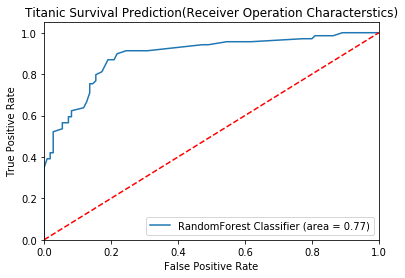

In [61]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, RFC.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Survival Prediction(Receiver Operation Characterstics)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# LOGISTIC REGRESSION

In [62]:
#Fitting the model into logistic regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
#predicting the future value 
y_pd_log=log.predict(X_test)

In [64]:
log.score(X_train,y_train)*100

83.14606741573034

In [65]:
log.score(X_test,y_test)*100

79.88826815642457

In [66]:
conf=confusion_matrix(y_test,y_pd_log)

In [67]:
conf

array([[90, 20],
       [16, 53]], dtype=int64)

In [68]:
f = pd.DataFrame({'y_pd_log':y_pd_log, 'y_test':y_test})

In [69]:
#f

In [70]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



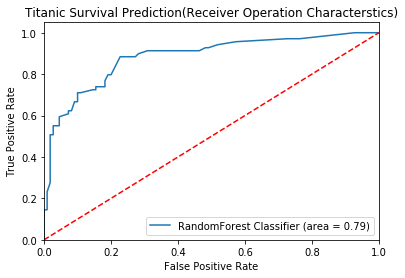

In [71]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Survival Prediction(Receiver Operation Characterstics)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()